# Setting up Fastai library

In [1]:
#importing the libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from fastai.tabular.all import *

/opt/python/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
# Setting the directory structure
path = Path('input/')
Path.BASE_PATH = path
path.ls()

(#5) [Path('train.csv'),Path('data_description.txt'),Path('test.csv'),Path('sample_submission.csv'),Path('house-prices-advanced-regression-techniques.zip')]

In [12]:
#importing the data
train = pd.read_csv(path/'train.csv', low_memory=False)
test = pd.read_csv(path/'test.csv', low_memory=False)

In [13]:
train.shape

(1460, 81)

In [14]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
#Ordinal Variable
# train['OverallQual']

In [17]:
#dependent variable
dep_var = 'SalePrice'
train[dep_var] = np.log(train[dep_var])

# TabularPandas and TabularProc

In [18]:
proc = [Categorify, FillMissing]

In [19]:
cont, cat = cont_cat_split(train, 1, dep_var=dep_var)

In [20]:
splits = RandomSplitter(0.2)

In [21]:
splits = splits(train)

In [22]:
to = TabularPandas(train, procs=proc, cat_names=cat, cont_names=cont,splits = splits, y_names=dep_var)

In [23]:
len(to.train), len(to.valid)

(1168, 292)

In [24]:
to.show(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1282,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Mn,LwQ,Rec,GasA,TA,Y,SBrkr,Gd,Typ,#na#,Detchd,Unf,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,1283,20,61.0,8800,5,7,1977,2008,0.0,532,144,364,1040,1040,0,0,1040,0,0,2,0,3,1,5,0,1977.0,2,484,0,0,0,0,288,0,0,9,2009,11.921719
1097,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,True,False,False,1098,120,69.0,3696,8,5,1986,1986,0.0,0,0,1074,1074,1088,0,0,1088,0,0,1,1,2,1,5,0,1987.0,2,461,0,74,137,0,0,0,0,10,2007,12.043553
1158,RL,Pave,#na#,Reg,Lvl,AllPub,FR2,Gtl,Somerst,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,ConLD,Partial,False,False,False,1159,20,92.0,11932,8,5,2007,2008,186.0,0,0,1580,1580,1580,0,0,1580,0,0,2,0,3,1,7,0,2008.0,3,830,0,24,0,0,0,0,0,6,2008,12.367886
1187,RL,Pave,#na#,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,1Story,Gable,CompShg,ImStucc,ImStucc,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,#na#,GdPrv,#na#,WD,Normal,False,False,False,1188,20,89.0,12461,8,5,1994,1995,0.0,1456,0,168,1624,1624,0,0,1624,1,0,2,0,2,1,5,1,1994.0,3,757,0,114,192,0,0,0,0,7,2006,12.476100
970,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,AsbShng,AsbShng,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,N,FuseA,TA,Typ,#na#,#na#,#na#,#na#,#na#,Y,#na#,#na#,#na#,WD,Abnorml,False,False,True,971,50,60.0,10800,4,4,1949,1950,0.0,0,0,720,720,720,472,0,1192,0,0,1,1,4,1,6,0,1980.0,0,0,0,0,0,0,0,0,0,12,2006,11.813030


In [25]:
to.items.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1282,1283,20,4,61.0,8800,2,0,1,4,1,...,0,0,9,2009,9,5,11.921719,1,1,1
1097,1098,120,4,69.0,3696,2,0,4,4,1,...,0,0,10,2007,9,5,12.043553,2,1,1
1158,1159,20,4,92.0,11932,2,0,4,4,1,...,0,0,6,2008,4,6,12.367886,1,1,1
1187,1188,20,4,89.0,12461,2,0,4,4,1,...,0,0,7,2006,9,5,12.476100,1,1,1
970,971,50,4,60.0,10800,2,0,4,4,1,...,0,0,12,2006,9,1,11.813030,1,1,2


# Decision Tree

In [26]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [27]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [28]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [29]:
m_rmse(m, xs, y)

0.0

In [30]:
m_rmse(m, valid_xs, valid_y)

0.208261

In [31]:
m.get_n_leaves(), len(train)

(1117, 1460)

In [32]:
m = DecisionTreeRegressor(min_samples_leaf=10)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.127331, 0.189843)

In [33]:
m.get_n_leaves()

93

# Random Forest

In [34]:
def rf(xs, y, n_estimators=40, max_samples=800,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [35]:
m = rf(xs, y);

In [36]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.109435, 0.15191)

In [37]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, bu

In [38]:
r_mse(preds.mean(0), valid_y)

0.15191

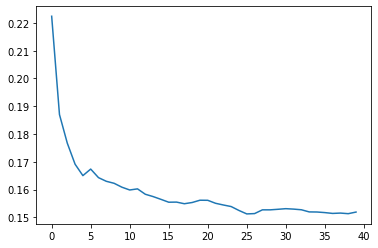

In [39]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [40]:
r_mse(m.oob_prediction_, y)

0.151846

# Tree Variance of predicted Score

In [41]:

preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, bu

In [42]:
preds.shape

(40, 292)

In [43]:
preds_std = preds.std(0)

In [44]:
preds_std[:5]

array([0.13660162, 0.18996509, 0.14970797, 0.1782208 , 0.21567893])

# Feature Importance

In [45]:

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [46]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,OverallQual,0.306399
62,GrLivArea,0.168625
18,ExterQual,0.094123
72,GarageCars,0.074369
52,YearBuilt,0.052673
58,TotalBsmtSF,0.042537
73,GarageArea,0.038277
30,KitchenQual,0.027987
59,1stFlrSF,0.024716
55,BsmtFinSF1,0.017948


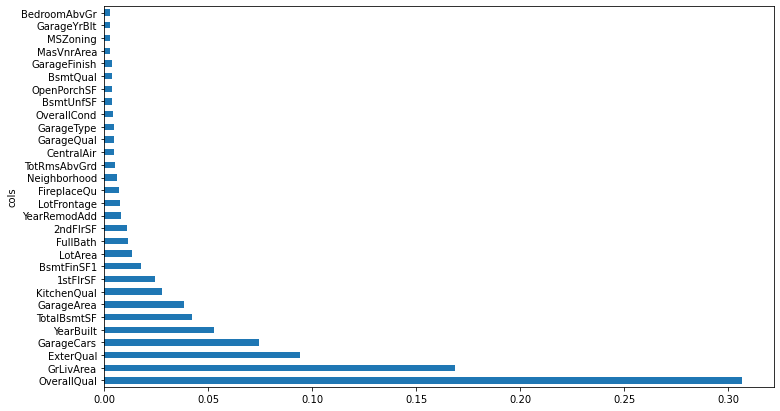

In [47]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

# Remove Low Important variables

In [48]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

18

In [49]:

xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [50]:

m = rf(xs_imp, y)

In [51]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.116372, 0.156274)

In [52]:
len(xs.columns), len(xs_imp.columns)

(83, 18)

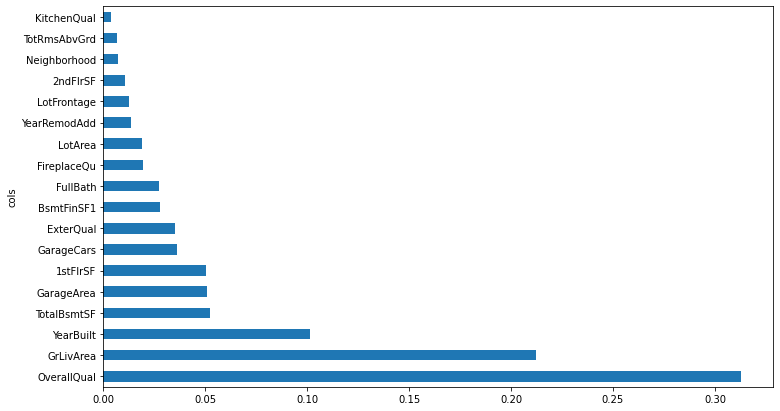

In [53]:
plot_fi(rf_feat_importance(m, xs_imp));

In [54]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

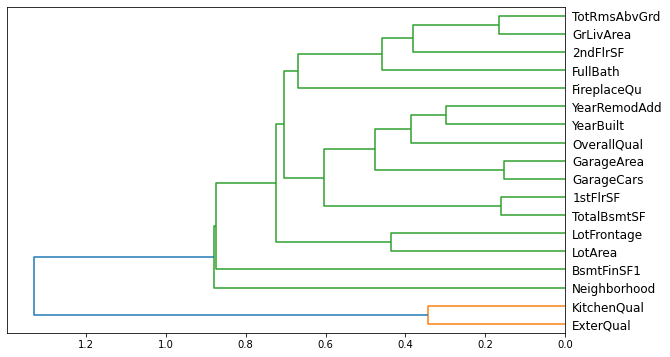

In [55]:
cluster_columns(xs_imp)

# Partial Dependence

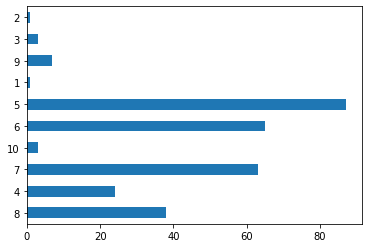

In [56]:
p = valid_xs_imp['OverallQual'].value_counts(sort=False).plot.barh()
# c = to.classes['OverallQual']
# plt.yticks(range(len(c)), c);

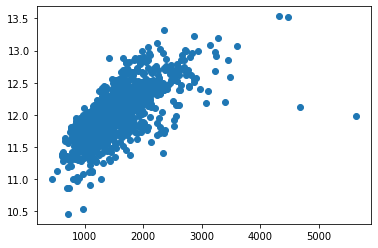

In [57]:
# GrLivArea vs y
plt.scatter(xs_imp['GrLivArea'],y)

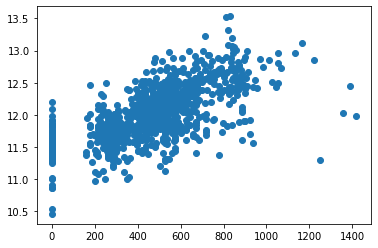

In [58]:
# GarageArea vs y
plt.scatter(xs_imp['GarageArea'],y)

/opt/python/3.10.4/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


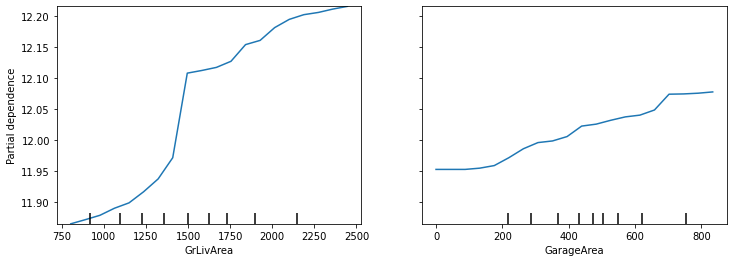

In [59]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_imp, ['GrLivArea','GarageArea'],
                        grid_resolution=20, ax=ax);

# Tree Interpreter

In [63]:
!pip install treeinterpreter -q
!pip install waterfallcharts -q

You should consider upgrading via the '/opt/python/latest/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/latest/bin/python3 -m pip install --upgrade pip' command.


In [67]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

# from treeinterpreter import treeinterpreter
# from waterfall_chart import plot as waterfall

In [68]:
row = valid_xs_imp.iloc[:5]

In [69]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [70]:

prediction[0], bias[0], contributions[0].sum()

(array([12.4249394]), 12.02460842779279, 0.40033097040385596)

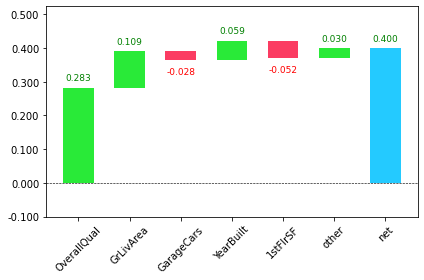

In [71]:
waterfall(valid_xs_imp.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');